<a href="https://colab.research.google.com/github/pailamadhulatha2/SmartEnergy-Forecasting/blob/main/Smart%20Energy%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 2018Floor1.csv to 2018Floor1 (1).csv
First few rows of the dataset:
                  Date  z1_Light(kW)  z1_Plug(kW)  z2_AC1(kW)  z2_AC2(kW)  \
0  2018-07-01 00:00:00         12.94        18.56       45.24        0.01   
1  2018-07-01 00:01:00         12.97        18.55       45.28        0.02   
2  2018-07-01 00:02:00         12.97        18.55       45.24        0.01   
3  2018-07-01 00:03:00         12.98        18.58       45.26        0.02   
4  2018-07-01 00:04:00         13.01        18.60       45.22        0.02   

   z2_AC3(kW)  z2_AC4(kW)  z2_Light(kW)  z2_Plug(kW)  z3_Light(kW)  \
0        0.01        0.00         13.76        17.64         10.92   
1        0.01        0.01         13.76        17.21         10.95   
2        0.01        0.01         13.79        17.18         10.94   
3        0.01        0.00         13.81        16.64         10.94   
4        0.01        0.01         13.83        15.69         10.97   

   z3_Plug(kW)  z4_Light(kW)  
0         

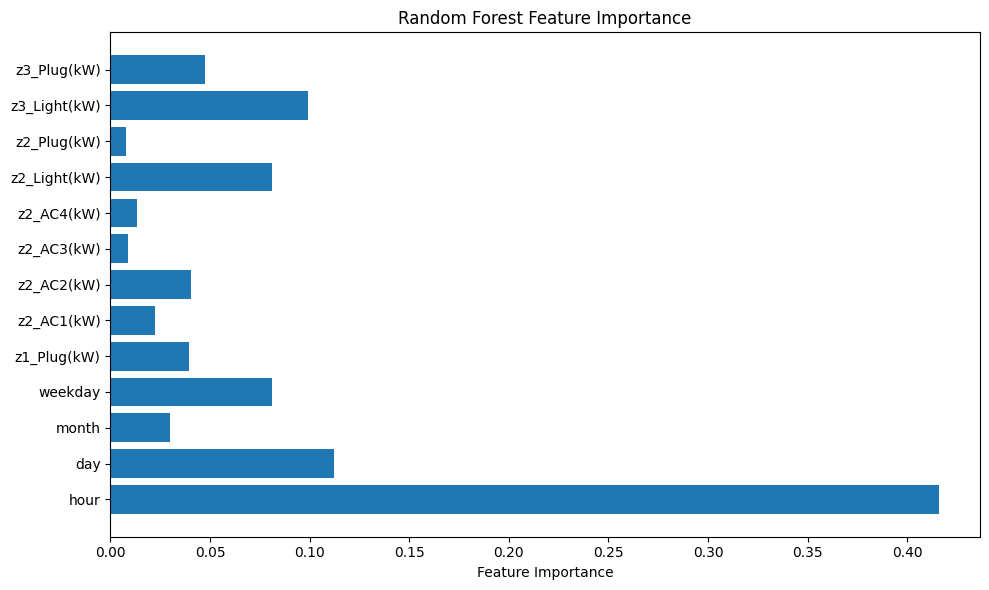

In [2]:
#  Install required libraries (only needed once in Colab)
!pip install pandas numpy openpyxl scikit-learn matplotlib

#  Upload your CSV file manually
from google.colab import files
uploaded = files.upload()

#  Load the dataset
import pandas as pd
import numpy as np

df = pd.read_csv('2018Floor1.csv')  # Make sure filename matches uploaded file

#  Preview the data
print("First few rows of the dataset:")
print(df.head())

#  Show data info
print("\nData info:")
print(df.info())

#  Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])  # Auto-detects format

#  Extract time-based features
df['hour'] = df['Date'].dt.hour
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.dayofweek

#  Check and handle missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with missing data
df = df.dropna()
print("\nFirst few rows after cleaning:")
print(df.head())

#  Define input features and output label
X = df[['hour', 'day', 'month', 'weekday',
        'z1_Plug(kW)', 'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)', 'z2_AC4(kW)',
        'z2_Light(kW)', 'z2_Plug(kW)', 'z3_Light(kW)', 'z3_Plug(kW)']]
y = df['z1_Light(kW)']  # Target variable

#  Show shapes of input and output
print("\nInput feature shape:", X.shape)
print("Output label shape:", y.shape)

#  Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

#  Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42, n_estimators=30, n_jobs=-1)  # Optimized for speed

#  Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

#  Predict on the test data
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

#  Evaluate models
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n Linear Regression Results:")
print("RMSE:", np.sqrt(mse_lr))
print("R2 Score:", r2_lr)

print("\n Random Forest Results:")
print("RMSE:", np.sqrt(mse_rf))
print("R2 Score:", r2_rf)

#  Optional: Feature importance from Random Forest
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
